In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import json
from datetime import datetime
from pprint import pprint

#from api_keys import api_key
#The above line of code will not work.  It continues to tell me there 
#is no module named 'api_keys'.  I never had an issue with this while
#doing class work.  I'm skipping it.

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#my unsecure solution to not being able to grab data from another worksheet
api_key = 'd53a12ca3d62240eafdefe91c64bb21c'

#Listing the txt file where the output data will go
output_data_file = 'Output Data/cities'


In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


613

In [3]:
cities_df = pd.DataFrame({'Cities':cities})

In [4]:
#Perform a weather check on each city using a series of successive API calls
#Inclide a print log of each city as it's being processed (city # & name)

count = 0

#make blank columns for the data required
cities_df['Temperature'] = ""
cities_df['Cloudiness'] = ""
cities_df['Wind Speed'] = ""
cities_df['Humidity'] = ""
cities_df['Latitude'] = ""
cities_df['Longitude'] = ""
cities['Date'] = ""

cities_df.head()

,Cities,Temperature,Cloudiness,Wind Speed,Humidity,Latitude,Longitude
0,ushuaia,,,,,,
1,saint george,,,,,,
2,manokwari,,,,,,
3,emerald,,,,,,
4,bluff,,,,,,


In [10]:
#Perform a weather check on each city using a series of successive API calls
#Inclide a print log of each city as it's being processed (city # & name)

count = 0

#make blank columns for the data required
#cities_df['Temperature'] = int()
#cities_df['Cloudiness'] = int()
#cities_df['Wind Speed'] = int()
#cities_df['Humidity'] = int()
#cities_df['Latitude'] = int()
#cities_df['Longitude'] = int()

data = []
latitude = []
longitude = []
temp = []
humidity = []
cloudiness = []
wind_speed = []


#iterating over the rows and returning the index
#creating a for loop using the OWM api
for index, row in cities_df.iterrows():
    count+=1
    #time.sleep(1)
    
    url = 'http://api.openweathermap.org/data/2.5/weather?' 
    
    query_url = url  + '&appid=' + api_key + '&units=imperial' + '&q=' + row['Cities']
    
    #print log
    print('Processing Record'  + str(count) + 'cities')
    print(query_url)
    #row_count += 1
    
    #pull the weather data 
    #data_of_city = requests.get(query_url).json()
    
    #figure out a way to skip the cities w/o data
    try:
        data_of_city = requests.get(query_url).json()
        data.append(data_of_city['dt'])
        lat.append(data_of_city['coord']['lat'])
        long.append(data_of_city['coord']['lat'])
        temp.append(data_of_city['main']['temp'])
        #humidity.append(data_of_city)['main']['humidity']
        cloudiness.append(data_of_city['clouds']['all'])
        wind_speed.append(data_of_city['wind']['speed'])
        
        
        #wind = data_of_city['wind']['speed']
        #clouds = data_of_city['clouds']['all']
        #humidity = data_of_city['main']['humidity']
        #latitude = data_of_city['coord']['lat']
        #longitude = data_of_city['coord']['lon']
        
        #cities_df.set_value(index,'Temperature', temp)
        #cities_df.set_value(index, 'Wind Speed', wind)
        #cities_df.set_value(index, 'Cloudiness', clouds)
        #cities_df.set_value(index, 'Humidity', humidity)
        #cities_df.set_value(index, 'Latitude', lat)
        #cities_df.set_value(index, 'Longitude', lon)
        
        print("Processing Record #" + str(count) + " | " + str(row['cities']))
        print(query_url)
    except KeyError:
        print('City not found.  Skipping...')
    continue 
    
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')
#data_of_city
#cities_df

Processing Record1cities
http://api.openweathermap.org/data/2.5/weather?&appid=d53a12ca3d62240eafdefe91c64bb21c&units=imperial&q=ushuaia
City not found.  Skipping...
Processing Record2cities
http://api.openweathermap.org/data/2.5/weather?&appid=d53a12ca3d62240eafdefe91c64bb21c&units=imperial&q=saint george
City not found.  Skipping...
Processing Record3cities
http://api.openweathermap.org/data/2.5/weather?&appid=d53a12ca3d62240eafdefe91c64bb21c&units=imperial&q=manokwari
City not found.  Skipping...
Processing Record4cities
http://api.openweathermap.org/data/2.5/weather?&appid=d53a12ca3d62240eafdefe91c64bb21c&units=imperial&q=emerald
City not found.  Skipping...
Processing Record5cities
http://api.openweathermap.org/data/2.5/weather?&appid=d53a12ca3d62240eafdefe91c64bb21c&units=imperial&q=bluff
City not found.  Skipping...
Processing Record6cities
http://api.openweathermap.org/data/2.5/weather?&appid=d53a12ca3d62240eafdefe91c64bb21c&units=imperial&q=half moon bay
City not found.  Skipp

KeyboardInterrupt: 

In [6]:
cities_df = pd.DataFrame({'Cities': cities})
cities_df

,Cities
0,ushuaia
1,sataua
2,punta arenas
3,barentsburg
4,bahia blanca
5,asau
6,suntar
7,cidreira
8,rikitea
9,egvekinot


In [7]:
cities_df.to_csv('Output Data/cities')
cities_df.head()

,Cities
0,ushuaia
1,sataua
2,punta arenas
3,barentsburg
4,bahia blanca


In [ ]:
data_of_city_df = pd.DataFrame(({'Cities':cities, 'Max Temp': temp,
                               'Cloudiness': clouds, 'Wind Speed': wind,
                               'Humidity':humidity}))
data_of_city_df.head()

ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c = 0      64.99
1      13.68
2       78.8
3      78.93
4       53.6
5       17.6
6     -19.36
7       84.2
8           
9           
10          
11          
12          
13          
14          
15          
16          
17          
18          
19          
20          
21          
22          
23          
24          
25          
26          
27          
28          
29          
       ...  
597         
598         
599         
600         
601         
602         
603         
604         
605         
606         
607         
608         
609         
610         
611         
612         
613         
614         
615         
616         
617         
618         
619         
620         
621         
622         
623         
624         
625         
626         
Name: Temperature, Length: 627, dtype: object.

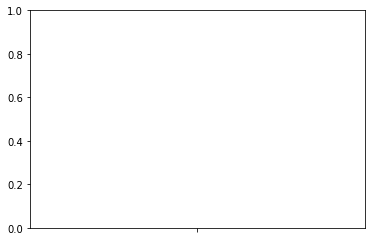

In [100]:
#use c map function for mapping
plt.scatter(cities_df['Latitude'],
           cities_df['Temperature'],
           
            #Set color to temperature data to signify temperature for each city
           
            c = cities_df["Temperature"],
            edgecolor = "black", linewidths = 1, marker = "o",
            cmap="coolwarm", alpha = 0.8, label = "City" )

plt.show()